In [1]:
import cv2
import skimage

import matplotlib.pyplot as plt
import numpy as np

import cv2
import numpy as np
import os

In [2]:
# Paths to predicted masks for roots, seeds, and shoots
root_mask_path = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_root'
seed_mask_path = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_seed'
shoot_mask_path = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_shoot'

# Function to load masks from a directory
def load_masks_from_directory(directory):
    masks = []
    for filename in os.listdir(directory):
        mask = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        masks.append(mask)
    return masks

# Load masks for roots, seeds, and shoots
root_masks = load_masks_from_directory(root_mask_path)
seed_masks = load_masks_from_directory(seed_mask_path)
shoot_masks = load_masks_from_directory(shoot_mask_path)

# Apply thresholding (if needed) to each mask set

# Merge masks
def merge_masks(masks):
    merged_mask = np.zeros_like(masks[0])
    for mask in masks:
        merged_mask = np.maximum(merged_mask, mask)
    return merged_mask

# Merge masks for roots, seeds, and shoots
merged_root_mask = merge_masks(root_masks)
merged_seed_mask = merge_masks(seed_masks)
merged_shoot_mask = merge_masks(shoot_masks)

In [3]:
# Directories containing the masks
root_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_root'
seed_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_seed'
shoot_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_shoot'

output_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all'

# Function to combine masks pairwise from each directory and save the results
def combine_pairwise_masks(root_dir, seed_dir, shoot_dir, output_dir):
    root_files = os.listdir(root_dir)
    seed_files = os.listdir(seed_dir)
    shoot_files = os.listdir(shoot_dir)

    num_masks = min(len(root_files), len(seed_files), len(shoot_files))

    for i in range(num_masks):
        root_mask = cv2.imread(os.path.join(root_dir, root_files[i]), cv2.IMREAD_GRAYSCALE)
        seed_mask = cv2.imread(os.path.join(seed_dir, seed_files[i]), cv2.IMREAD_GRAYSCALE)
        shoot_mask = cv2.imread(os.path.join(shoot_dir, shoot_files[i]), cv2.IMREAD_GRAYSCALE)

        combined_mask = cv2.bitwise_or(root_mask, seed_mask)
        combined_mask = cv2.bitwise_or(combined_mask, shoot_mask)

        cv2.imwrite(os.path.join(output_dir, f'combined_mask_{i}.png'), combined_mask)

# Combine masks pairwise from each directory
combine_pairwise_masks(root_directory, seed_directory, shoot_directory, output_directory)


In [4]:
plant_1 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_13.png")
plant_1 = cv2.cvtColor(plant_1, cv2.COLOR_BGR2GRAY)
plant_1 = cv2.medianBlur(plant_1, 5)

plant_1 = plant_1[230:-300, 675:-675]

th, thresholded_1 = cv2.threshold(plant_1, 5, 255, cv2.THRESH_BINARY)
retval_1, labels_1 = cv2.connectedComponents(thresholded_1)

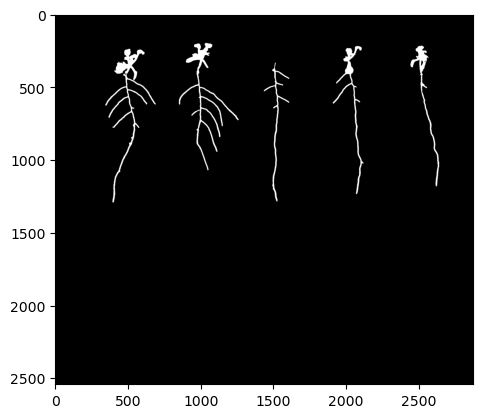

In [5]:
# Filter connected components to keep only the five largest objects
sizes = [np.sum(labels_1 == i) for i in range(1, retval_1)]
largest_indices = np.argsort(sizes)[::-1][:5]  # Indices of the largest five components

# Create a mask to select only the five largest components on the thresholded image
mask_thresholded = np.zeros_like(thresholded_1, dtype=np.uint8)
for idx in largest_indices:
    mask_thresholded[labels_1 == idx + 1] = 255  # Set pixels belonging to the five largest components to white

# Apply the mask to the thresholded image
masked_thresholded_1 = cv2.bitwise_and(thresholded_1, thresholded_1, mask=mask_thresholded)

plt.imshow(masked_thresholded_1, cmap='gray')

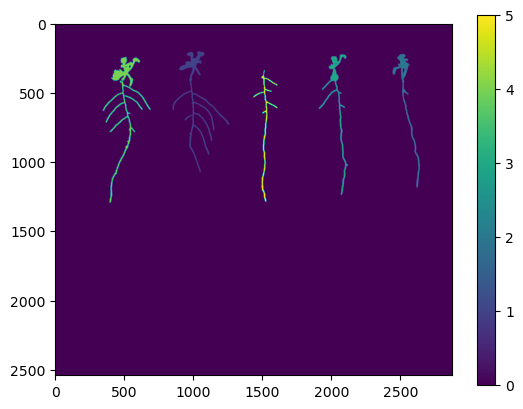

In [6]:
retval, labels = cv2.connectedComponents(masked_thresholded_1)
plt.imshow(labels)
plt.colorbar()

---

In [7]:
plant_2 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_2.png")

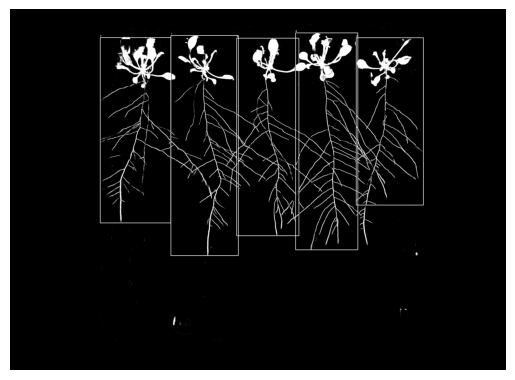

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the combined mask
combined_mask = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_2.png", cv2.IMREAD_GRAYSCALE)


# Add thicker black vertical lines at specified x-coordinates
cv2.line(combined_mask, (1377, 0), (1350, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (1895, 0), (2000, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (2415, 0), (2500, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (2920, 0), (3000, combined_mask.shape[0]), (0, 0, 0), thickness=5)

# Apply thresholding to reduce noise
_, thresholded = cv2.threshold(combined_mask, 10, 255, cv2.THRESH_BINARY)


# Perform morphological operations (erosion and dilation) to refine the mask
kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel)

# Find contours in the processed mask
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on contour area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]  # Limit to top 5 contours

# Assign unique IDs to each instance
instance_id = 0
for contour in contours:
    # Calculate the area of the contour to filter out noise
    area = cv2.contourArea(contour)
    if area > 100:  # Adjust the threshold as needed to filter out smaller areas (noise)
        # Draw a bounding box around the contour with a brighter color for each instance
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(combined_mask, str(instance_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.rectangle(combined_mask, (x, y), (x + w, y + h), (255, 255, 255), 3)  # Increased thickness and brighter color
        instance_id += 1


# Display the instance segmentation result with more visible bounding boxes and larger black lines using matplotlib
plt.imshow(combined_mask, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()



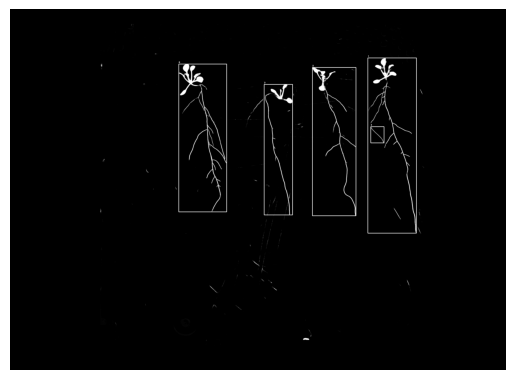

In [9]:

import numpy as np
import matplotlib.pyplot as plt

# Load the combined mask
combined_mask = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_11.png", cv2.IMREAD_GRAYSCALE)


# Add thicker black vertical lines at specified x-coordinates
cv2.line(combined_mask, (1377, 0), (1350, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (1895, 0), (2000, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (2415, 0), (2500, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (2920, 0), (3000, combined_mask.shape[0]), (0, 0, 0), thickness=5)

# Apply thresholding to reduce noise
_, thresholded = cv2.threshold(combined_mask, 10, 255, cv2.THRESH_BINARY)


# Perform morphological operations (erosion and dilation) to refine the mask
kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel)

# Find contours in the processed mask
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on contour area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]  # Limit to top 5 contours

# Assign unique IDs to each instance
instance_id = 0
for contour in contours:
    # Calculate the area of the contour to filter out noise
    area = cv2.contourArea(contour)
    if area > 100:  # Adjust the threshold as needed to filter out smaller areas (noise)
        # Draw a bounding box around the contour with a brighter color for each instance
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(combined_mask, str(instance_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.rectangle(combined_mask, (x, y), (x + w, y + h), (255, 255, 255), 3)  # Increased thickness and brighter color
        instance_id += 1


# Display the instance segmentation result with more visible bounding boxes and larger black lines using matplotlib
plt.imshow(combined_mask, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

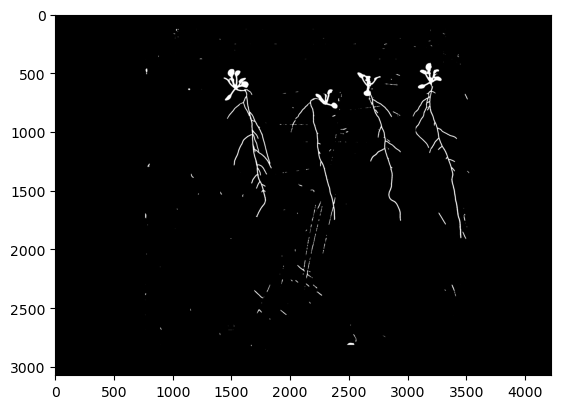

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the combined mask
combined_mask = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_11.png", cv2.IMREAD_GRAYSCALE)

# Apply thresholding to reduce noise
_, thresholded = cv2.threshold(combined_mask, 10, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')

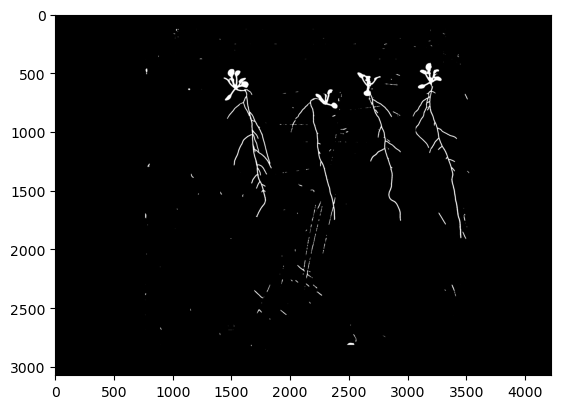

In [11]:
plt.imshow(thresholded, cmap='gray')

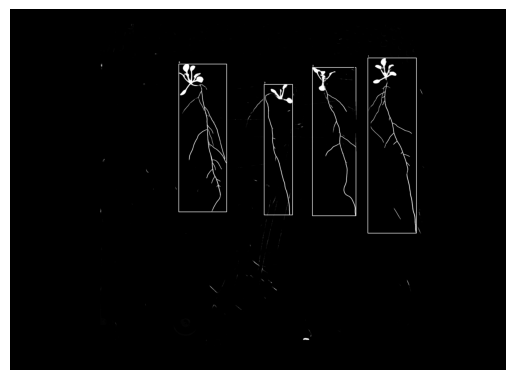

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the combined mask
combined_mask = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_11.png", cv2.IMREAD_GRAYSCALE)

# Apply thresholding to reduce noise
_, thresholded = cv2.threshold(combined_mask, 10, 255, cv2.THRESH_BINARY)

# Perform morphological operations (erosion and dilation) to refine the mask
kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel)

# Find contours in the processed mask
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small noise contours
filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > 5000]

# Sort contours based on contour area and limit to the number of significant contours found
contours_to_use = sorted(filtered_contours, key=cv2.contourArea, reverse=True)[:len(filtered_contours)]

# Assign unique IDs to each instance
instance_id = 0
for contour in contours_to_use:
    # Draw a bounding box around the contour with a brighter color for each instance
    x, y, w, h = cv2.boundingRect(contour)
    cv2.putText(combined_mask, str(instance_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    cv2.rectangle(combined_mask, (x, y), (x + w, y + h), (255, 255, 255), 3)  # Increased thickness and brighter color
    instance_id += 1

# Add thicker black vertical lines at specified x-coordinates
cv2.line(combined_mask, (1377, 0), (1350, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (1895, 0), (2000, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (2415, 0), (2500, combined_mask.shape[0]), (0, 0, 0), thickness=5)
cv2.line(combined_mask, (2920, 0), (3000, combined_mask.shape[0]), (0, 0, 0), thickness=5)

# Display the instance segmentation result with more visible bounding boxes and larger black lines using matplotlib
plt.imshow(combined_mask, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()
